In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random
%matplotlib inline
import re
import warnings

In [2]:
# success rate of gpu's

In [3]:
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [4]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', on_bad_lines='skip')
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [5]:
accre = pd.DataFrame(accre)
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [6]:
accre['USEDMEM'] = accre['USEDMEM'].str.replace(r'[a-zA-Z]','')
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [7]:
accre['REQTIME'] = accre['REQTIME'].astype(str)
accre['USEDTIME'] = accre['USEDTIME'].astype(str)
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'].str.replace('-',' days '))
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'].str.replace('-',' days '))
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME']).dt.total_seconds()
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME']).dt.total_seconds()
accre = accre[accre['USEDMEM'].map(len) > 1]
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,172800.0,793.0,1,2,1,pascal,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,18000.0,537.0,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,72000.0,18586.0,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,54000.0,15070.0,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40,302400.0,67776.0,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,432000.0,52.0,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.70,432000.0,2091.0,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,432000.0,243.0,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,432000.0,673.0,1,1,1,turing,0:0,COMPLETED


In [8]:
accre_df = accre

In [9]:
accre_pascal = accre_df[accre_df['PARTITION'] == 'pascal']
accre_maxwell = accre_df[accre_df['PARTITION'] == 'maxwell']
accre_turing = accre_df[accre_df['PARTITION'] == 'turing']

In [10]:
pascal_usedmem = accre_pascal[['USEDMEM']]
pascal_usedtime = accre_pascal[['USEDTIME']]
maxwell_usedmem = accre_maxwell[['USEDMEM']]
maxwell_usedtime = accre_maxwell[['USEDTIME']]
turing_usedmem = accre_turing[['USEDMEM']]
turing_usedtime = accre_turing[['USEDTIME']]

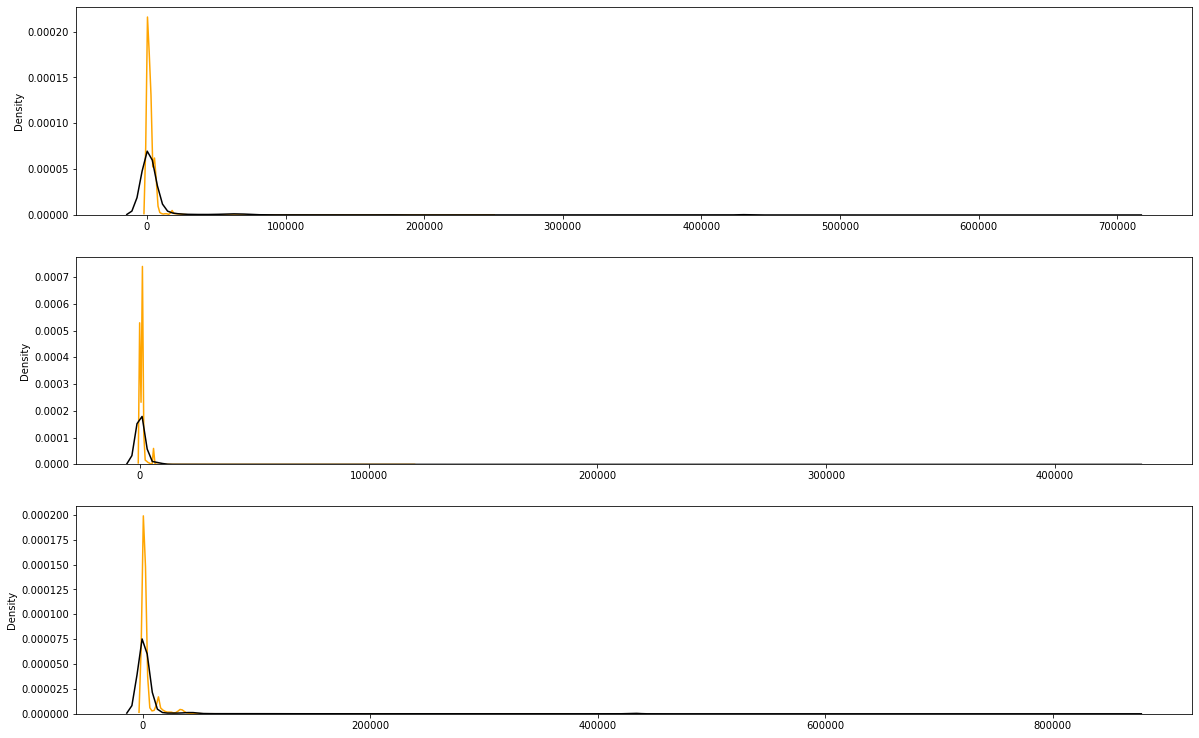

In [16]:
fig, ax = plt.subplots(3,figsize = (20,13))


sns.distplot(pascal_usedmem, hist=False, bins = 5, color = 'orange', ax = ax[0]),
sns.distplot(pascal_usedtime, hist=False, bins = 5, color = 'black', ax = ax[0]),
sns.distplot(maxwell_usedmem, hist=False, bins = 5, color = 'orange', ax = ax[1]),
sns.distplot(maxwell_usedtime, hist=False, bins = 5, color = 'black', ax = ax[1]),
sns.distplot(turing_usedmem, hist=False, bins = 5, color = 'orange', ax = ax[2]),
sns.distplot(turing_usedtime, hist=False, bins = 5, color = 'black', ax = ax[2])

plt.show()

In [12]:
# .squeeze() converts df to series
#accre_list = pd.DataFrame(accre, columns=['USEDMEM'])
#accre_list = accre_list.squeeze()
